Scale 불량률 영향인자 분석 및 Scale 불량률을 최소화 방법 예측

분석 배경:   
OO 공장의 고객사에서 최근 들어 "Scale 불량 발생 증가"라는 이슈가 발생했습니다.    
그 원인을 석해 본 결과 압연공정에서 Scale불량이 급증한 것을 확인할 수 있었습니다.    
그래서 데이터를 수집하여 다양한 분석을 통해 불량 발생의 근본 원인을 찾고 결과를 해석하여 개선 기회를 도출합니다.    

## 1. 가설 설정

가설.1  SCALE이 불량률과 압연온도는 상관관계가 있을 것입니다.
  
가설.2  SCALE이 불량률과 적업조는 상관관계가 있을 것입니다. 

가설.3  SCALE이 불량률과 가열로 호기는 상관관계가 있을 것입니다.

## 2. 데이터 처리

In [1]:
# 데이터 구성: Series, DataFrame
import pandas as pd 
# 행렬 계산
import numpy as np
# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글 폰트 (맑은 고딕) 적용
matplotlib.rc('font',family='Malgun Gothic')
matplotlib.rc('axes',unicode_minus=False)

2- 1 데이터 불러오기

In [3]:
df_raw = pd.read_csv("./SCALE불량.csv", engine="python", encoding = 'EUC-KR')
df_raw.head()

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2021-08-01:08:00:01,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1125,934,적용,8,2조
1,PB562775,2021-08-01:08:07:11,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1120,937,적용,8,2조
2,PB562776,2021-08-01:08:14:21,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1106,889,적용,8,3조
3,PB562777,2021-08-01:08:21:31,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1113,885,적용,8,3조
4,PB562778,2021-08-01:08:28:41,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1118,873,적용,8,1조


In [73]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PT_THICK           720 non-null    float64
 1   PT_WIDTH           720 non-null    float64
 2   PT_LENGTH          720 non-null    float64
 3   PT_WEIGHT          720 non-null    float64
 4   FUR_HZ_TEMP        720 non-null    float64
 5   FUR_HZ_TIME        720 non-null    float64
 6   FUR_SZ_TEMP        720 non-null    float64
 7   FUR_SZ_TIME        720 non-null    float64
 8   FUR_TIME           720 non-null    float64
 9   FUR_EXTEMP         720 non-null    float64
 10  ROLLING_TEMP_T5    720 non-null    float64
 11  ROLLING_DESCALING  720 non-null    float64
 12  SPEC               720 non-null    object 
 13  STEEL_KIND         720 non-null    object 
 14  FUR_NO             720 non-null    object 
 15  FUR_NO_ROW         720 non-null    object 
 16  HSB                720 non

2-2 데이터 정제

2-2-1 데이터 삭제

목표변수와 설명변수에 해당이 안되는   
df_raw의 PLATE_NO 와 ROLLING_DATE 컬럼을 제거 합니다.  

In [4]:
df_raw.drop(["PLATE_NO", "ROLLING_DATE"], axis = 1, inplace = True)
# df_raw의 컬럼 확인
df_raw.columns

Index(['SCALE', 'SPEC', 'STEEL_KIND', 'PT_THICK', 'PT_WIDTH', 'PT_LENGTH',
       'PT_WEIGHT', 'FUR_NO', 'FUR_NO_ROW', 'FUR_HZ_TEMP', 'FUR_HZ_TIME',
       'FUR_SZ_TEMP', 'FUR_SZ_TIME', 'FUR_TIME', 'FUR_EXTEMP',
       'ROLLING_TEMP_T5', 'HSB', 'ROLLING_DESCALING', 'WORK_GR'],
      dtype='object')

2-2-2 데이터 치환

In [5]:
df_raw['SCALE'] = np.where(df_raw['SCALE'] == "불량", 1, 0)
df_raw['SCALE'].value_counts()
# 불량이 231개 양품이 489개 인것을 알수 있습니다.

0    489
1    231
Name: SCALE, dtype: int64

2-2-3 목표변수와 설명변수 데이터 지정

In [6]:
# 설명 변수 
df_raw_x = df_raw.drop(["SCALE"], axis = 1, inplace = False) 
# 목표 변수
df_raw_y = df_raw["SCALE"] 

In [7]:
df_raw.head()

,SCALE,SPEC,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1열,1144,116,1133,59,282,1125,934,적용,8,2조
1,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,2열,1144,122,1135,53,283,1120,937,적용,8,2조
2,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1열,1129,116,1121,55,282,1106,889,적용,8,3조
3,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,2열,1152,125,1127,68,316,1113,885,적용,8,3조
4,0,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,1열,1140,134,1128,48,314,1118,873,적용,8,1조


2-2-4 데이터 분류( 변수형태가 범주형인 것과 연속형인것으로 나눕니다.)

변수형태가 연속형인 테이더에 대해 스케일링을 하기 위해서 입니다.  
이전 (종합실습1)에서 스케일링 과정을 거치지 않았었는데, 피드백을 받았습니다.  

연속형 변수

In [8]:
df_suqi = df_raw_x.select_dtypes(exclude = 'object')
df_suqi.head()


,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
0,32.25,3707,15109,14180,1144,116,1133,59,282,1125,934,8
1,32.25,3707,15109,14180,1144,122,1135,53,283,1120,937,8
2,33.27,3619,19181,18130,1129,116,1121,55,282,1106,889,8
3,33.27,3619,19181,18130,1152,125,1127,68,316,1113,885,8
4,38.33,3098,13334,12430,1140,134,1128,48,314,1118,873,8


수치형 데이터가 속한 12개의 컬럼이 df_suqi에 담겼음을 확인 할 수 있습니다.  
'PT_THICK', 'PT_WIDTH', 'PT_LENGTH', 'PT_WEIGHT', 'FUR_HZ_TEMP', 'FUR_HZ_TIME', 'FUR_SZ_TEMP',  'FUR_SZ_TIME', 'FUR_TIME', 'FUR_EXTEMP','ROLLING_TEMP_T5', 'ROLLING_DESCALING'
    

범주형 변수

In [9]:
df_bumju = df_raw_x.select_dtypes(include = 'object')
df_bumju.head()

,SPEC,STEEL_KIND,FUR_NO,FUR_NO_ROW,HSB,WORK_GR
0,AB/EH32-TM,T1,1호기,1열,적용,2조
1,AB/EH32-TM,T1,1호기,2열,적용,2조
2,NV-E36-TM,T8,2호기,1열,적용,3조
3,NV-E36-TM,T8,2호기,2열,적용,3조
4,BV-EH36-TM,T8,3호기,1열,적용,1조


연속형 데이터 스케일링 하기

In [10]:
from sklearn.preprocessing import StandardScaler 

In [11]:
# Data Scaling
scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_suqi)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns = df_suqi.columns)

df_raw = pd.concat([df_numeric_scaled, df_bumju], axis=1)
df_raw = pd.concat([df_raw, df_raw_y], axis=1)
df_raw.head()

,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING,SPEC,STEEL_KIND,FUR_NO,FUR_NO_ROW,HSB,WORK_GR,SCALE
0,0.155812,1.738951,-1.390441,-1.103810,-0.543782,0.767342,-0.949149,-0.626453,-0.409268,-0.816535,0.000734,-0.19693,AB/EH32-TM,T1,1호기,1열,적용,2조,0
1,0.155812,1.738951,-1.390441,-1.103810,-0.543782,0.932981,-0.835252,-0.856618,-0.387221,-1.096730,0.028567,-0.19693,AB/EH32-TM,T1,1호기,2열,적용,2조,0
2,0.209106,1.568896,-1.095771,-0.944112,-1.263141,0.767342,-1.632537,-0.779897,-0.409268,-1.881276,-0.416748,-0.19693,NV-E36-TM,T8,2호기,1열,적용,3조,0
3,0.209106,1.568896,-1.095771,-0.944112,-0.160124,1.015800,-1.290843,-0.281206,0.340311,-1.489003,-0.453858,-0.19693,NV-E36-TM,T8,2호기,2열,적용,3조,0
4,0.473482,0.562094,-1.518889,-1.174562,-0.735611,1.264257,-1.233894,-1.048422,0.296219,-1.208808,-0.565186,-0.19693,BV-EH36-TM,T8,3호기,1열,적용,1조,0


2-2-5 결측치 확인

In [12]:
df_raw.isnull().sum()

PT_THICK             0
PT_WIDTH             0
PT_LENGTH            0
PT_WEIGHT            0
FUR_HZ_TEMP          0
FUR_HZ_TIME          0
FUR_SZ_TEMP          0
FUR_SZ_TIME          0
FUR_TIME             0
FUR_EXTEMP           0
ROLLING_TEMP_T5      0
ROLLING_DESCALING    0
SPEC                 0
STEEL_KIND           0
FUR_NO               0
FUR_NO_ROW           0
HSB                  0
WORK_GR              0
SCALE                0
dtype: int64

결측치가 존재 하지 않음을 알 수 있습니다.

2-2-6 이상치 확인

<AxesSubplot:>

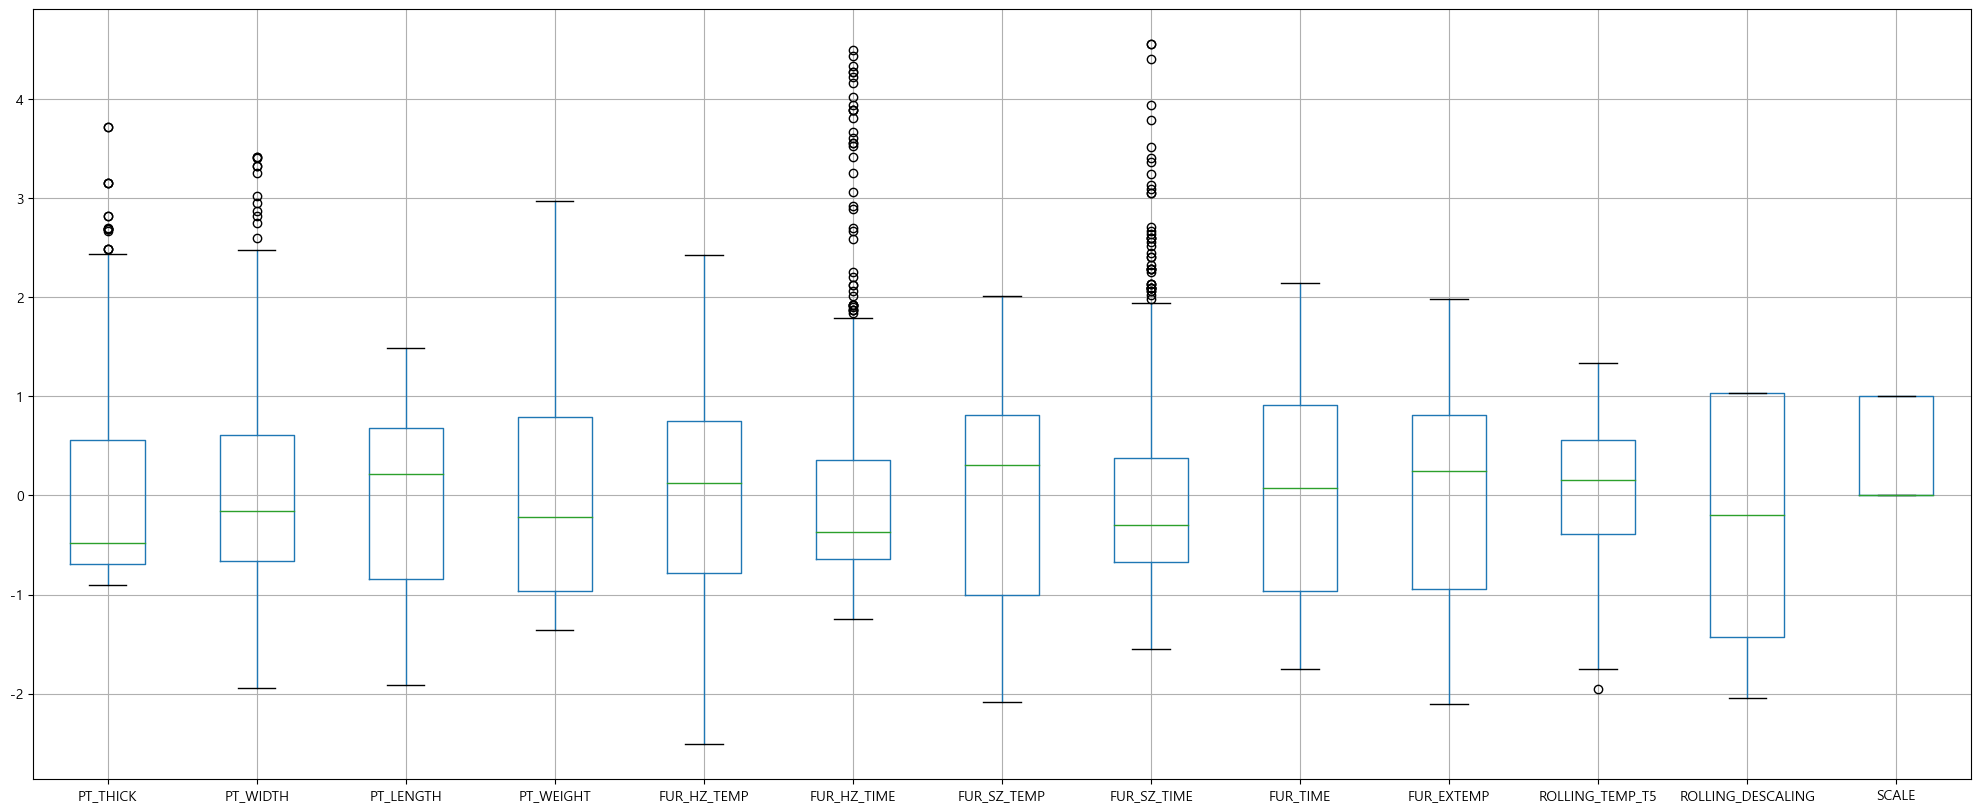

In [72]:
df_raw.boxplot(figsize=(25,10))

컬럼이 ROLLING_TEMP_T5에서 이상치를 확인할수 있습니다.  

ROLLING_TEMP_T5란??  
압연온도라고 합니다...  
압연의 공우 일정한 온도에서 이루어지는 공정입니다.
혼자 떨어진 이 값들은 스케일링 전에는 ROLLING_TEMP_T5가 0인 값입니다.

온도가 0에서 양품이 나올 리가 없기 때문에,  
잘못 입력된값이라고 생각해서 압연온도의 평균값으로 대체 하겠습니다.

이상치 ROLLING_TEMP_T5(압연온도)의 평균으로 대체하기

In [14]:
a = df_raw['ROLLING_TEMP_T5'].mean()

In [15]:
b = df_raw['ROLLING_TEMP_T5'].min()

In [16]:
df_raw = df_raw.replace(b,a)

<AxesSubplot:>

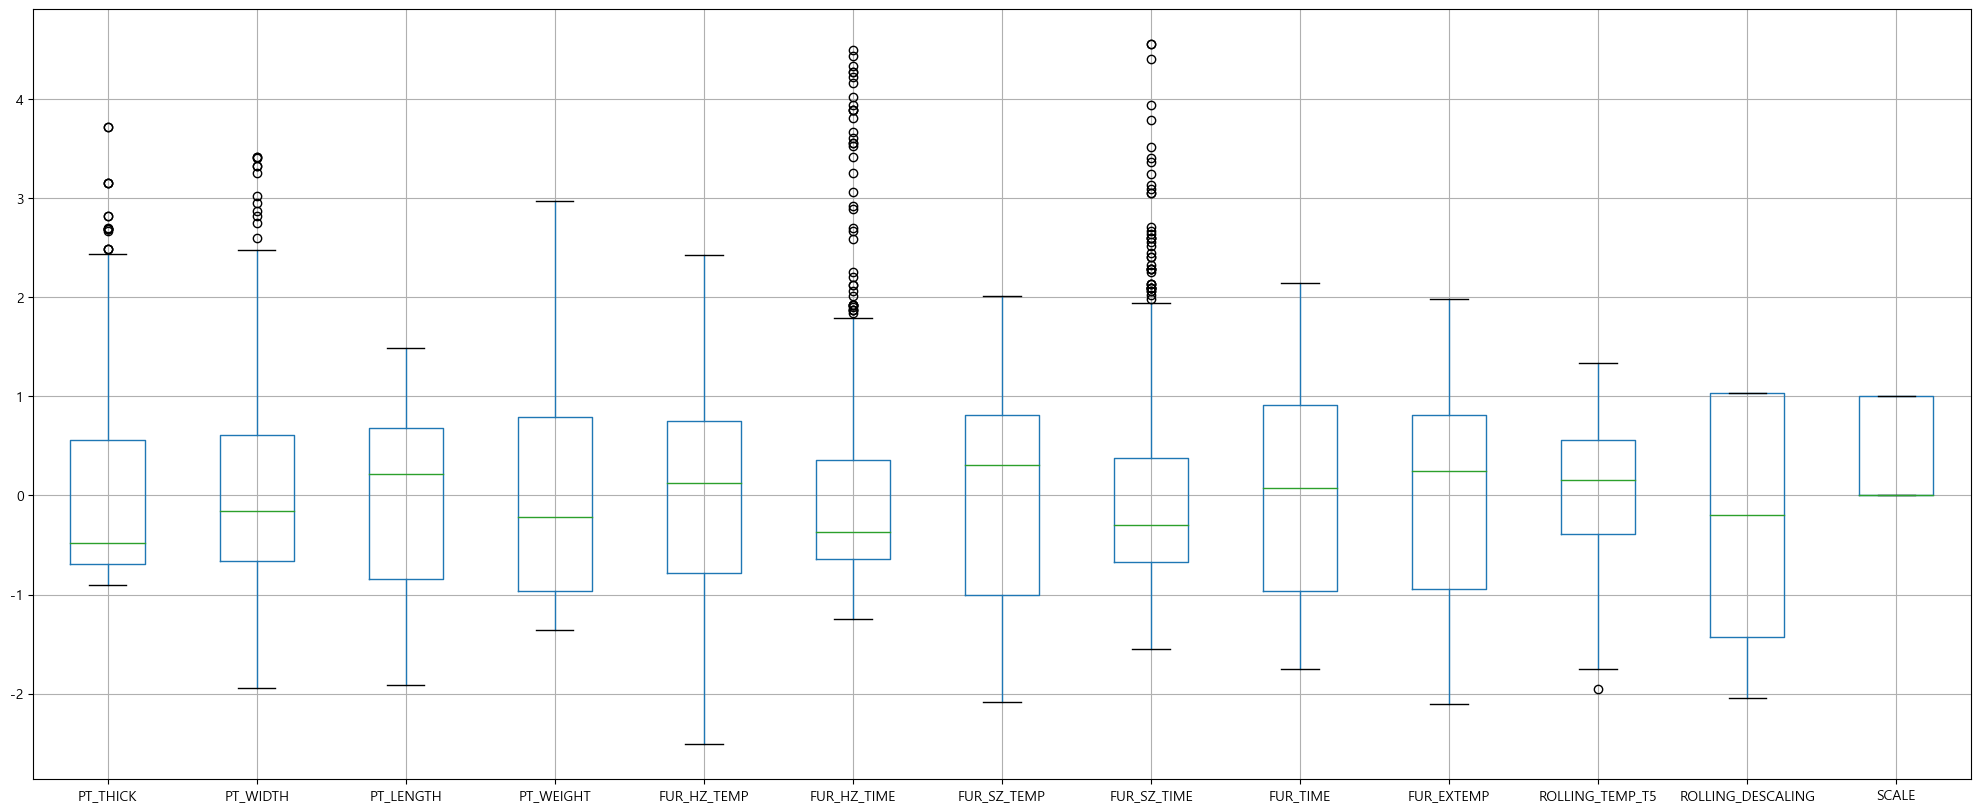

In [17]:
df_raw.boxplot(figsize=(25,10))

이상치 처리 완료

## 3. 탐색적 분석 

#### 불량과 양품의 비율 시각적으로 확인

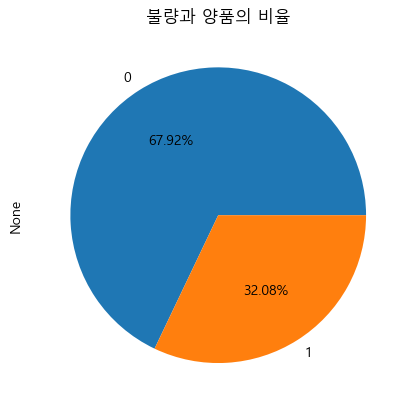

In [18]:
df_SCALE= df_raw.groupby(["SCALE"]).size()
df_SCALE.plot(kind = 'pie', autopct="%.2f%%")
plt.title('불량과 양품의 비율')
plt.show()
# 불량은 1 양품은 0

불량은 약 32.08% 양품은 약 67.92% 임을 알수 있습니다.

#### SPEC(제품규격) 데이터 분석

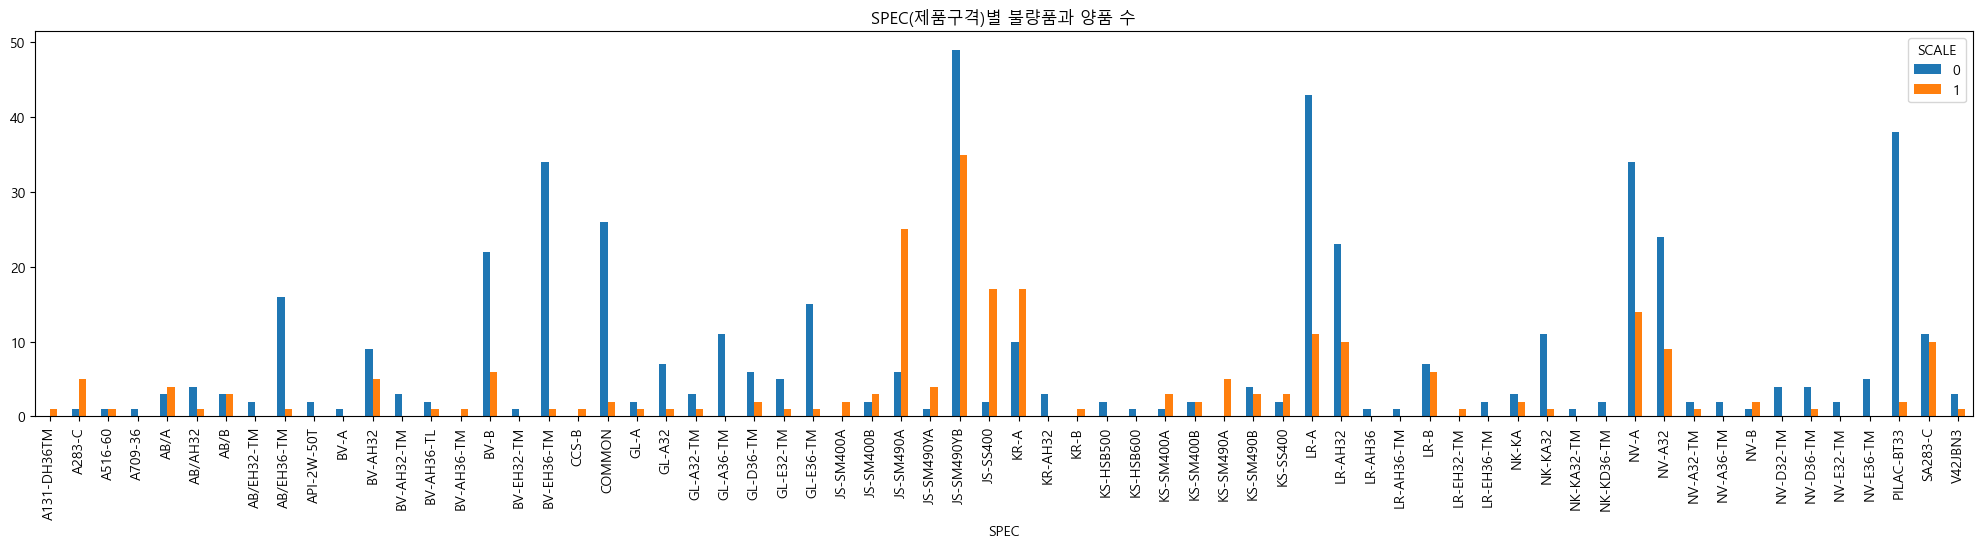

In [19]:
df_SPEC = df_raw.groupby(["SPEC",'SCALE'])['SCALE'].count().unstack('SCALE')
df_SPEC.plot(kind='bar', figsize=(25,5))
plt.title('SPEC(제품구격)별 불량품과 양품 수')
plt.show()

# 불량은 1 양품은 0

In [20]:
df_raw['spec_type'] = df_raw.SPEC.str.split("-").str[0]
df_raw['spec_type'].value_counts()

JS         146
LR         105
NV         105
BV          86
GL          56
PILAC       40
KR          31
COMMON      28
KS          28
SA283       21
NK          20
AB/EH36     17
AB/A         7
AB/B         6
A283         6
AB/AH32      5
V42JBN3      4
API          2
A516         2
AB/EH32      2
A131         1
CCS          1
A709         1
Name: spec_type, dtype: int64

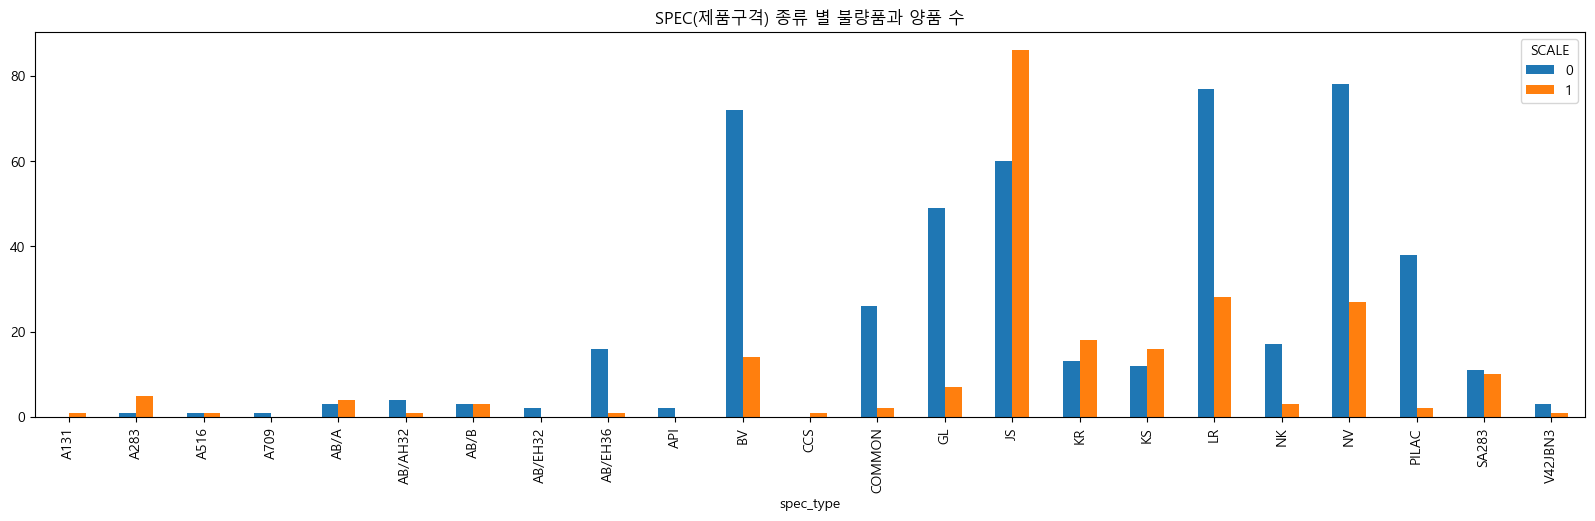

In [21]:
df_spec_type = df_raw.groupby(["spec_type",'SCALE'])['SCALE'].count().unstack('SCALE')
df_spec_type.plot(kind='bar', figsize=(20,5))
plt.title('SPEC(제품구격) 종류 별 불량품과 양품 수')
plt.show()

SPECK(제품규격) EDA를 살펴본 결과 A131, A283, AB/A, CCS, JS, KR, KS, SA283인 경우 scale 이 양품보다 불량품이 더 많았습니다.  
이제 제품들은 불량률이 높은 것을 알 수 있었습니다.  

#### STEEL_KIND(강종) 데이터분석

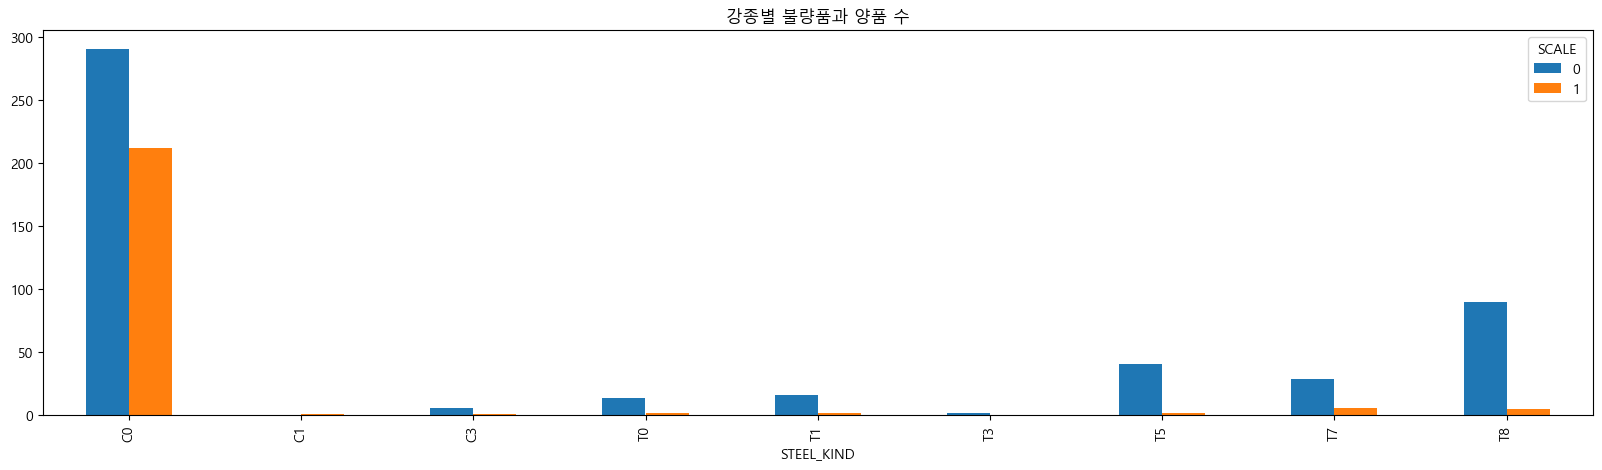

In [22]:
df_STEEL_KIND = df_raw.groupby(["STEEL_KIND",'SCALE'])['SCALE'].count().unstack('SCALE')
df_STEEL_KIND.plot(kind='bar', figsize=(20,5))
plt.title('강종별 불량품과 양품 수')
plt.show()

STEEL_KIND(강종)이 CO일때 불량품이 많이 나온다는것을 알수 있습니다.

#### FUR_NO(가열호기) 데이터 분석

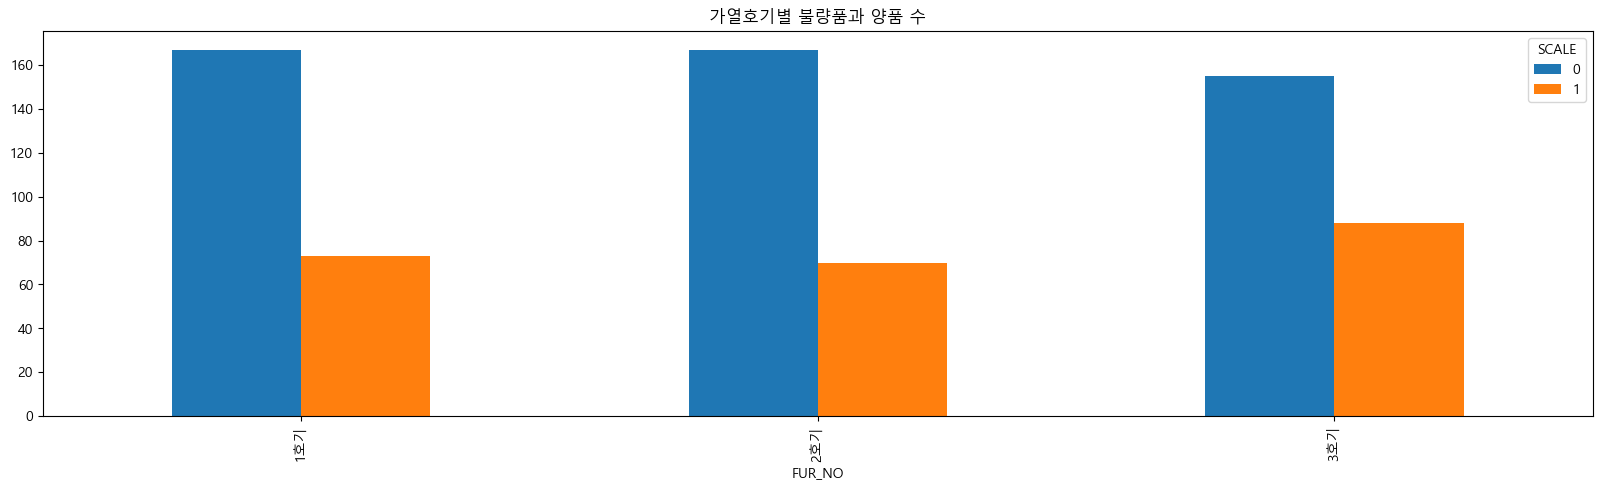

In [23]:
df_FUR_NO = df_raw.groupby(["FUR_NO",'SCALE'])['SCALE'].count().unstack('SCALE')
df_FUR_NO.plot(kind='bar', figsize=(20,5))
plt.title('가열호기별 불량품과 양품 수')
plt.show()

FUR_NO(가열호기)의 모든 호기의 전체 개수가 비슷한 것을 확인할 수 있습니다.

#### HSB(HSB 적용 여부) 데이터 분석

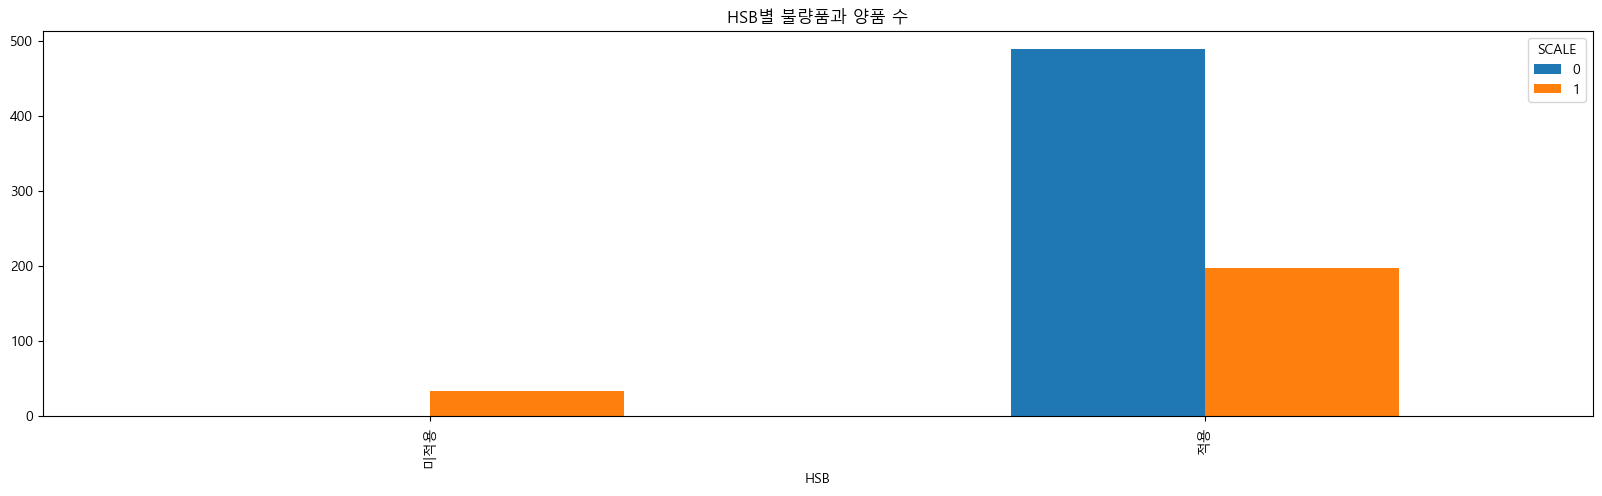

In [24]:
df_HSB = df_raw.groupby(["HSB",'SCALE'])['SCALE'].count().unstack('SCALE')
df_HSB.plot(kind='bar', figsize=(20,5))
plt.title('HSB별 불량품과 양품 수')
plt.show()

#### WORK_GK(작업조) 데이터 분석

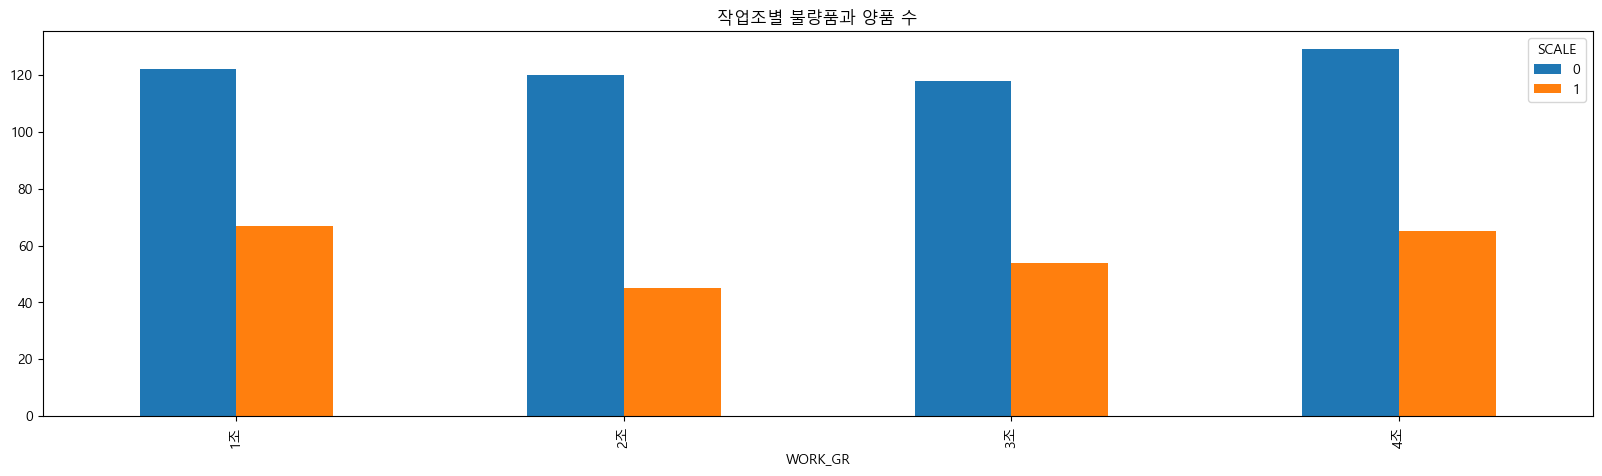

In [25]:
df_WORK_GR = df_raw.groupby(["WORK_GR",'SCALE'])['SCALE'].count().unstack('SCALE')
df_WORK_GR.plot(kind='bar', figsize=(20,5))
plt.title('작업조별 불량품과 양품 수')
plt.show()

#### 변수간의 상관 관계 확인

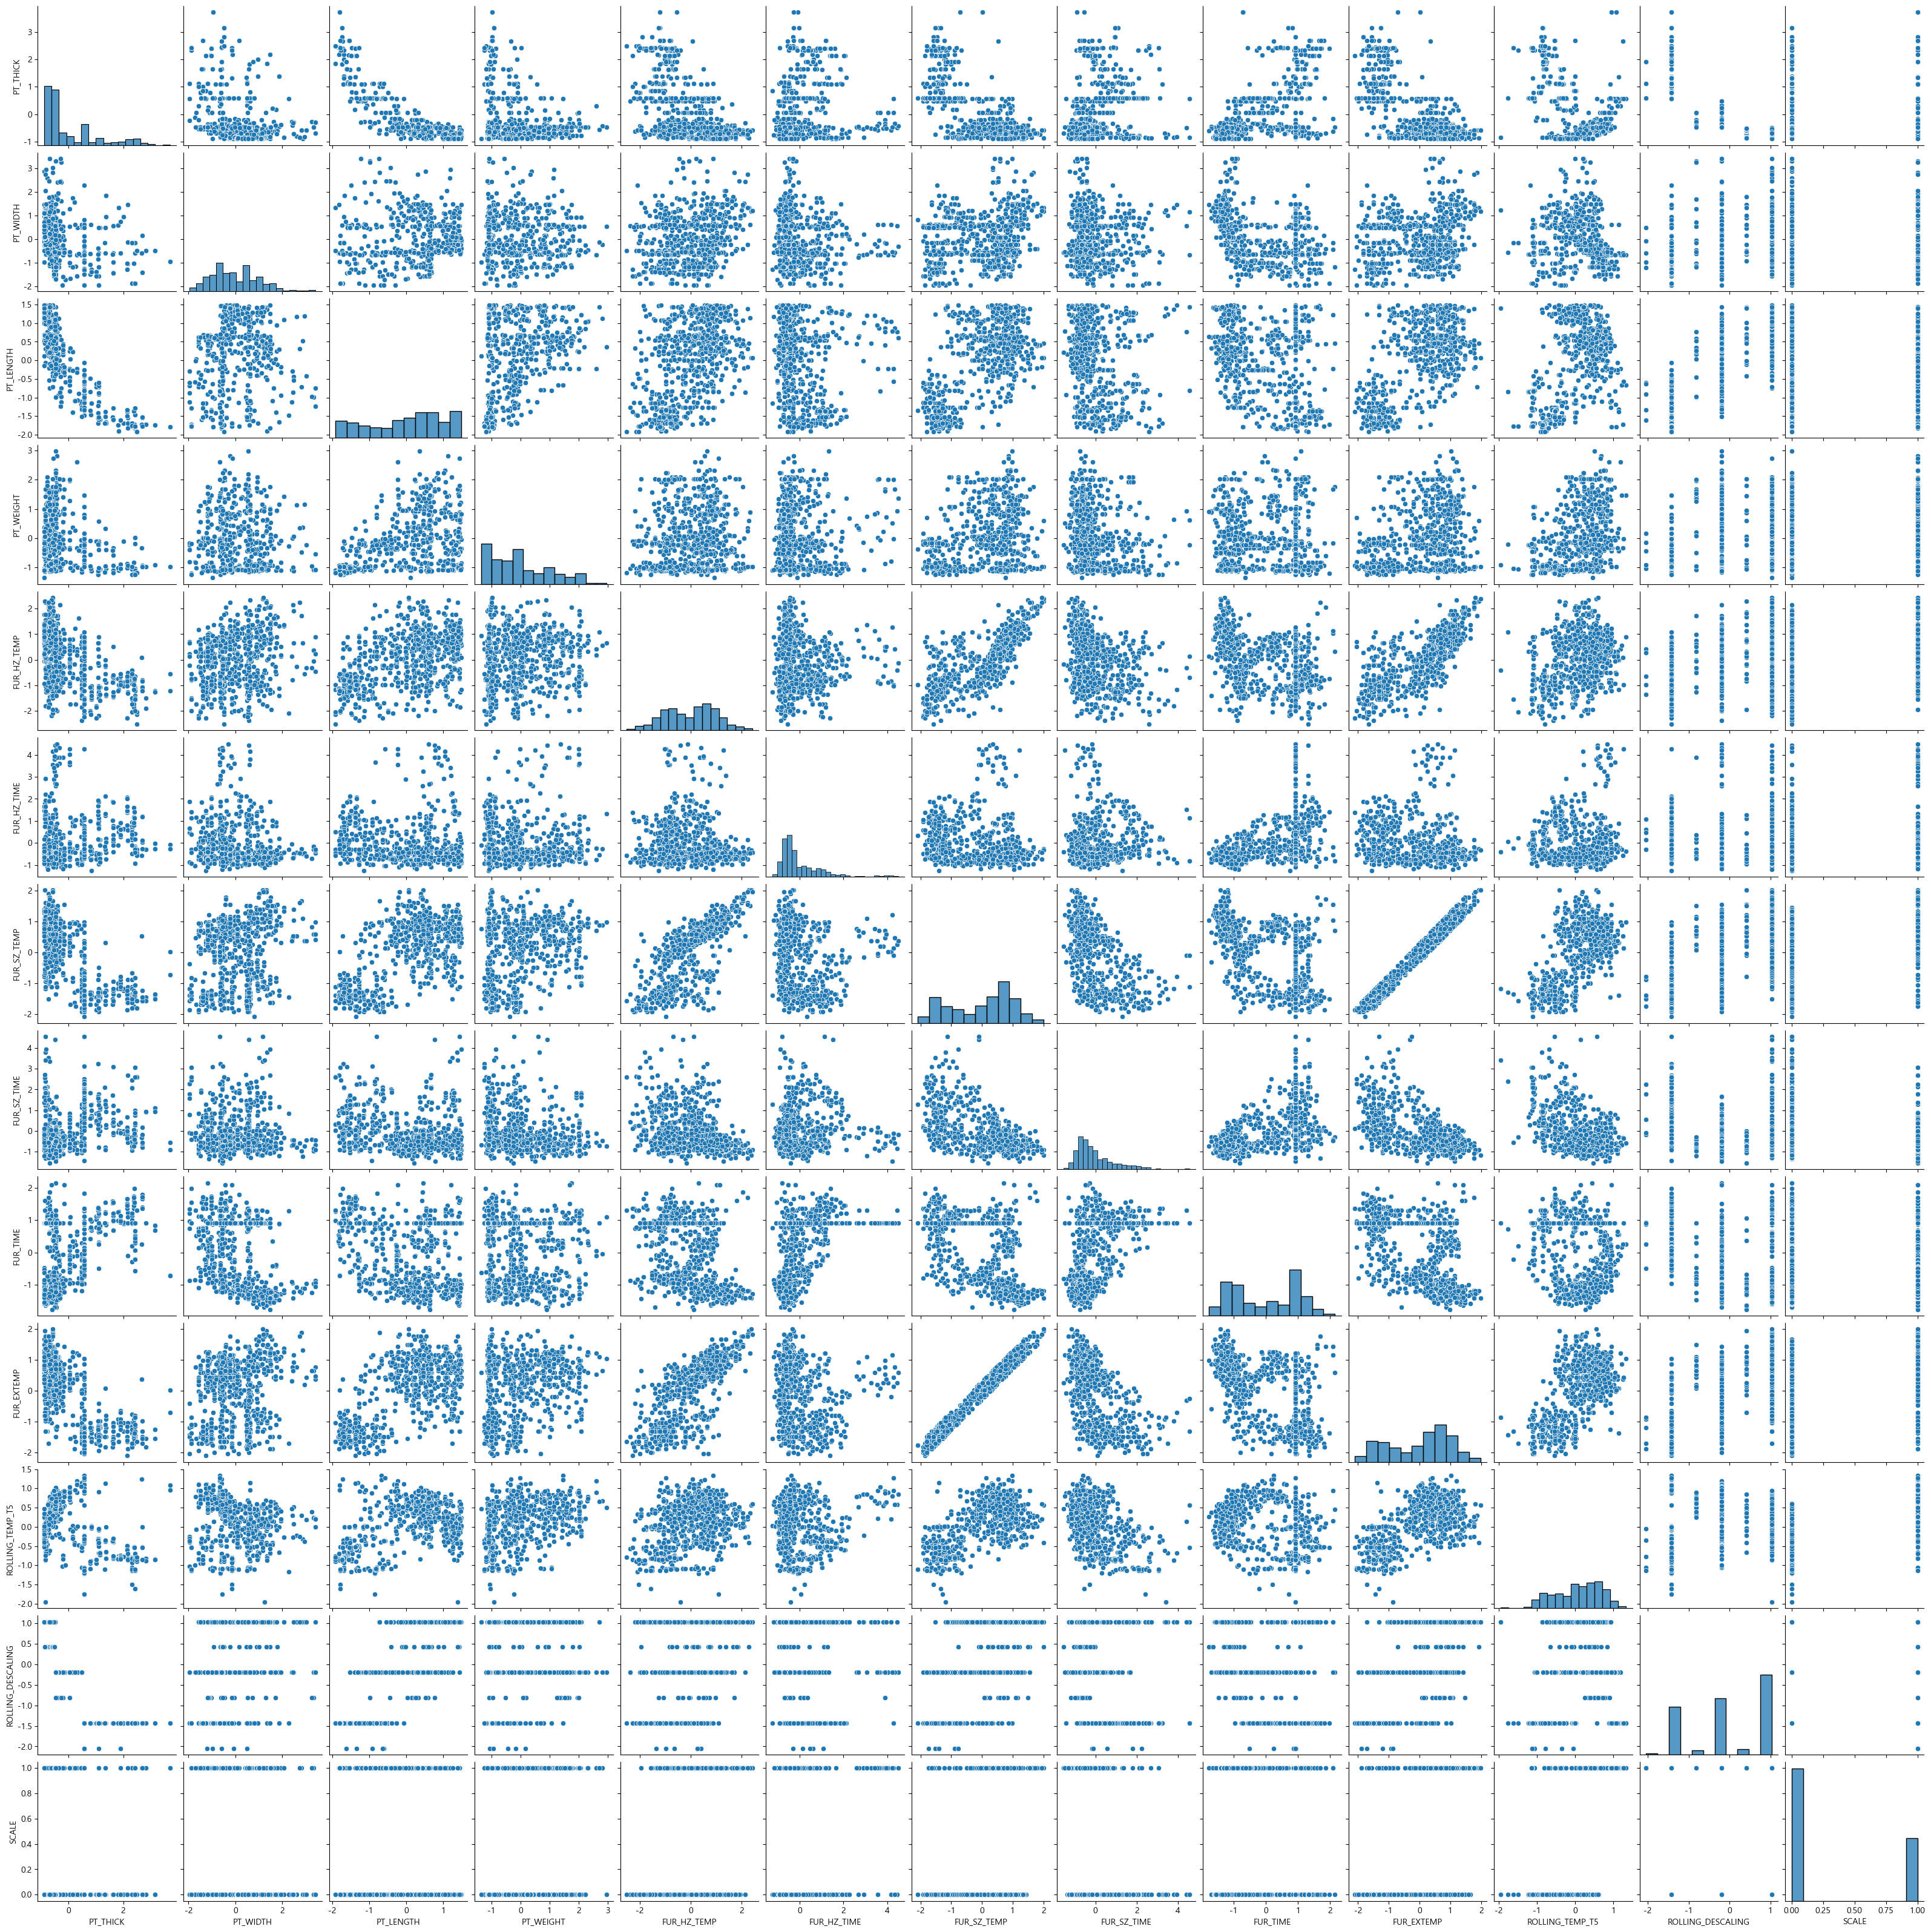

In [26]:
sns.pairplot(df_raw)

In [27]:
df_raw.corr()

,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING,SCALE
PT_THICK,1.000000,-0.313151,-0.862618,-0.397391,-0.523926,0.171835,-0.694770,0.269365,0.413009,-0.687565,-0.497441,-0.836631,-0.124858
PT_WIDTH,-0.313151,1.000000,0.119726,0.031009,0.180024,-0.126002,0.227296,-0.051361,-0.393200,0.216078,-0.111239,0.337540,-0.206021
PT_LENGTH,-0.862618,0.119726,1.000000,0.451815,0.473111,-0.090338,0.645402,-0.230159,-0.251950,0.641330,0.432096,0.809280,0.100475
PT_WEIGHT,-0.397391,0.031009,0.451815,1.000000,0.153331,0.007292,0.359513,-0.193112,-0.057776,0.361377,0.419302,0.238986,0.218741
FUR_HZ_TEMP,-0.523926,0.180024,0.473111,0.153331,1.000000,-0.112438,0.772907,-0.327912,-0.348223,0.758185,0.354927,0.470899,0.247670
FUR_HZ_TIME,0.171835,-0.126002,-0.090338,0.007292,-0.112438,1.000000,-0.210175,0.067994,0.483407,-0.196404,0.004005,-0.152363,0.064466
FUR_SZ_TEMP,-0.694770,0.227296,0.645402,0.359513,0.772907,-0.210175,1.000000,-0.566177,-0.477177,0.985245,0.657534,0.648646,0.374809
FUR_SZ_TIME,0.269365,-0.051361,-0.230159,-0.193112,-0.327912,0.067994,-0.566177,1.000000,0.490728,-0.565912,-0.478913,-0.285524,-0.255138
FUR_TIME,0.413009,-0.393200,-0.251950,-0.057776,-0.348223,0.483407,-0.477177,0.490728,1.000000,-0.467894,-0.209493,-0.366708,-0.049214
FUR_EXTEMP,-0.687565,0.216078,0.641330,0.361377,0.758185,-0.196404,0.985245,-0.565912,-0.467894,1.000000,0.652438,0.641546,0.374679


설명변수 간의 상관관계가 높은 변수가 몇개 보입니다.  
만약 상관관계가 높으면 모델의 신뢰성이 떨어지는 문제가 생길 수 있습니다.   
때문에 다중공선성을 확인해보겠습니다.     

#### 다중공선성 확인

다중공선성이란 
- 상관관계가 매우 높은 독립변수들이 동시에 모델에 포함될 때 발생합니다.  
- 만약 두 변수가 완벽하게 다중공선성에 걸려있으면, 같은 변수를 두번넣은 것이며 최소제곱법을 계산하는 것이 어렵습니다.  
- 완벽한 다중공선성이 아니더라도 다중공선성이 높다면 회귀계수의 표준오차가 비정상적으로 커지게됩니다.  
- 회귀계수의 유의성은 t-값에 의해 계산되는데(회귀계수 / 표준오차) 다중공선성으로 인해 표준오차가 비정상적으로 커지면 t값이 작아져서 p값이 유의해지지 않아 유의해야할 변수가 유의하지 않게됩니다. 

In [28]:
df_raw = df_raw.reset_index(drop=True)
df_raw_x = df_raw.drop(["SCALE"], axis = 1, inplace = False) # 설명 변수 
df_raw_y = df_raw["SCALE"] # 목표 변수

In [29]:

df_suqi = df_raw_x.select_dtypes(exclude = 'object')
suqi_cols = df_suqi.columns
suqi_cols

Index(['PT_THICK', 'PT_WIDTH', 'PT_LENGTH', 'PT_WEIGHT', 'FUR_HZ_TEMP',
       'FUR_HZ_TIME', 'FUR_SZ_TEMP', 'FUR_SZ_TIME', 'FUR_TIME', 'FUR_EXTEMP',
       'ROLLING_TEMP_T5', 'ROLLING_DESCALING'],
      dtype='object')

In [30]:
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["variable"] = df_suqi.columns
df_vif["VIF"] = [variance_inflation_factor(df_suqi.values, i) for i in range(df_suqi.shape[1])]

# VIF 정렬
df_vif.sort_values("VIF", ascending=True).round(2)

,variable,VIF
5,FUR_HZ_TIME,1.51
3,PT_WEIGHT,1.56
1,PT_WIDTH,1.78
7,FUR_SZ_TIME,2.12
8,FUR_TIME,2.38
10,ROLLING_TEMP_T5,2.78
4,FUR_HZ_TEMP,3.15
11,ROLLING_DESCALING,4.61
2,PT_LENGTH,6.21
0,PT_THICK,6.97


VIF가 10이상인 변수를 모두 지웁니다.

FUR_EXTEMP와 FUR_SZ_TEMP를 지웁니다.

## 4. 모델링

### 4-1. 군집분석

In [32]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [33]:
df_spec = df_raw.groupby(['SPEC']).sum()
df_spec

,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING,SCALE
SPEC,,,,,,,,,,,,,
A131-DH36TM,2.164763,1.474206,-1.819855,-0.942090,-1.311098,0.104789,-1.632537,2.672577,0.913519,-1.881276,-0.695070,-1.429880,1
A283-C,-1.740767,-2.391912,-0.877543,5.627420,3.259495,-3.098126,3.986428,-1.648876,1.137964,3.786835,4.457553,0.667848,5
A516-60,-1.720838,4.111743,2.184082,2.862298,2.701059,-0.867070,2.771516,-0.677495,-2.405880,2.625894,-0.555174,2.072042,1
A709-36,-0.158201,-0.013774,-0.391008,-0.328363,-0.256038,-0.695796,0.246779,-0.626453,-0.806104,0.360284,0.548100,-0.196930,0
AB/A,-3.975841,7.664269,2.514766,3.208423,1.900439,3.963471,4.176258,3.824040,-0.704323,3.586729,1.489523,4.169771,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
NV-E32-TM,-1.667545,-1.283635,2.920831,1.204669,-0.607991,-1.833293,-0.360677,-0.140443,-2.031091,-0.736446,-0.805664,2.072042,0
NV-E36-TM,6.114144,3.415323,-6.955969,-4.737134,-4.781072,2.815275,-6.340318,-1.060783,1.811790,-6.380274,-3.299078,-4.683501,0
PILAC-BT33,72.067547,-38.627798,-55.996048,-33.794647,-22.614510,44.414059,-58.809300,23.391572,57.286482,-57.710829,-17.033208,-57.195219,2


In [34]:
scaler = StandardScaler()
df_raw_scaled = scaler.fit_transform(df_spec)
df_raw_scaled[:5]

array([[ 0.13371566,  0.14636686, -0.11709102, -0.05654438, -0.13596454,
         0.01394144, -0.1191784 ,  0.38622452,  0.09362752, -0.13893092,
        -0.1773846 , -0.0986214 , -0.40713942],
       [-0.10752578, -0.23748148, -0.05646186,  0.33775857,  0.33801872,
        -0.41218303,  0.29101702, -0.23828549,  0.11663113,  0.27965517,
         0.43904005,  0.04606269,  0.24428365],
       [-0.10629478,  0.40823518,  0.1405257 ,  0.17179553,  0.28010739,
        -0.11535738,  0.20232612, -0.0979074 , -0.24658113,  0.19392046,
        -0.16064849,  0.14291245, -0.40713942],
       [-0.00977193, -0.00136756, -0.02515777, -0.01970841, -0.0265519 ,
        -0.09257055,  0.01801534, -0.09053124, -0.08261842,  0.02660673,
        -0.02866022, -0.01358259, -0.56999519],
       [-0.24558452,  0.76094844,  0.16180213,  0.19257003,  0.19708088,
         0.52731086,  0.30487497,  0.55262707, -0.07218677,  0.26487749,
         0.08396521,  0.28759655,  0.08142788]])

In [35]:
df_raw_scaled_y = df_raw_scaled[:, 0]
df_raw_scaled_x = df_raw_scaled[:, 1::]

In [36]:
Z_ward = linkage(df_raw_scaled_x, method='ward', metric='euclidean')
Z_average = linkage(df_raw_scaled_x, method='average', metric='euclidean')
Z_Minkowski = linkage(df_raw_scaled_x, method='average', metric='minkowski')

Z_ward


array([[  3.        ,  45.        ,   0.1363099 ,   2.        ],
       [ 46.        ,  52.        ,   0.14161581,   2.        ],
       [  0.        ,  14.        ,   0.14501414,   2.        ],
       [ 48.        ,  67.        ,   0.26516356,   3.        ],
       [ 16.        ,  66.        ,   0.27530112,   3.        ],
       [  9.        ,  36.        ,   0.32078145,   2.        ],
       [  5.        ,  34.        ,   0.32321297,   2.        ],
       [ 37.        ,  49.        ,   0.3240892 ,   2.        ],
       [ 39.        ,  41.        ,   0.33541757,   2.        ],
       [ 10.        ,  35.        ,   0.34741525,   2.        ],
       [ 53.        ,  56.        ,   0.37373984,   2.        ],
       [ 69.        ,  70.        ,   0.38768845,   6.        ],
       [  2.        ,  58.        ,   0.40611327,   2.        ],
       [ 61.        ,  71.        ,   0.41619496,   3.        ],
       [ 57.        ,  76.        ,   0.43670582,   3.        ],
       [ 20.        ,  75

Text(0, 0.5, 'sample index')

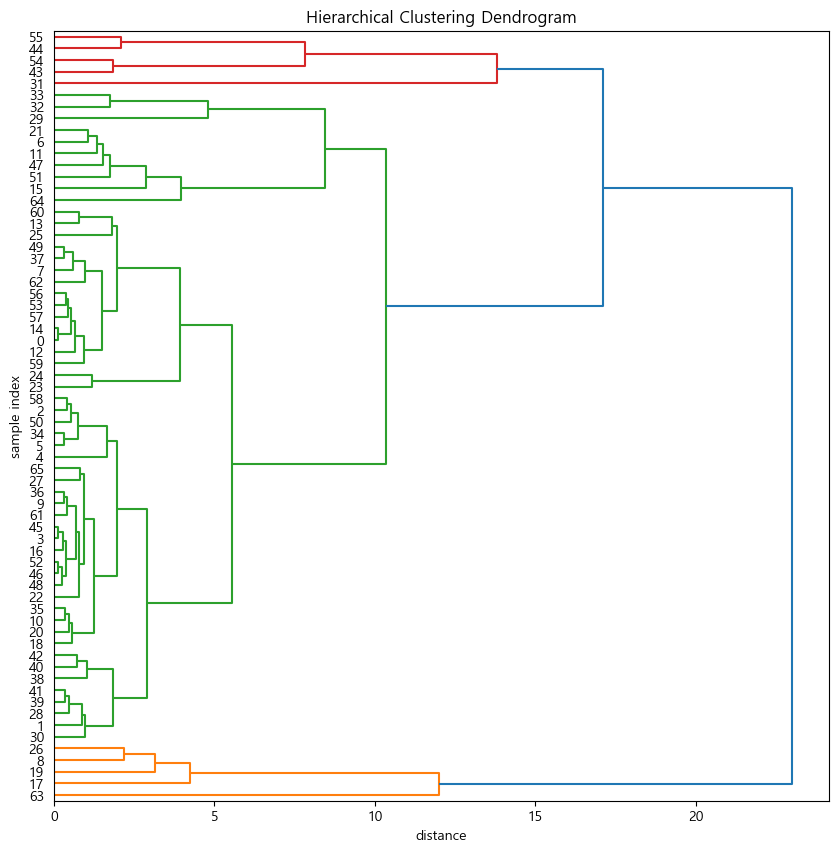

In [37]:
plt.figure(figsize=(10,10))
ax = plt.subplot(111)

dendrogram(Z_ward, leaf_font_size=10, orientation='right')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('distance')
plt.ylabel('sample index')

In [38]:
cluster_hierarchical = fcluster(Z = Z_ward, t = 5, criterion='distance')
df_spec['clusterHierarchical'] = cluster_hierarchical
df_spec['clusterHierarchical'].unique()

array([4, 3, 5, 1, 6, 9, 7, 8, 2])

In [39]:
df_spec.reset_index(drop = False, inplace = True)
df_raw_cluster_spec = df_spec[['SPEC', 'clusterHierarchical']]

In [74]:
df_merg = pd.merge(df_raw, df_raw_cluster_spec, how='left', on = 'SPEC')
df_merg

,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,...,ROLLING_DESCALING,SPEC,STEEL_KIND,FUR_NO,FUR_NO_ROW,HSB,WORK_GR,SCALE,spec_type,clusterHierarchical
0,0.155812,1.738951,-1.390441,-1.103810,-0.543782,0.767342,-0.949149,-0.626453,-0.409268,-0.816535,...,-0.196930,AB/EH32-TM,T1,1호기,1열,적용,2조,0,AB/EH32,4
1,0.155812,1.738951,-1.390441,-1.103810,-0.543782,0.932981,-0.835252,-0.856618,-0.387221,-1.096730,...,-0.196930,AB/EH32-TM,T1,1호기,2열,적용,2조,0,AB/EH32,4
2,0.209106,1.568896,-1.095771,-0.944112,-1.263141,0.767342,-1.632537,-0.779897,-0.409268,-1.881276,...,-0.196930,NV-E36-TM,T8,2호기,1열,적용,3조,0,NV,4
3,0.209106,1.568896,-1.095771,-0.944112,-0.160124,1.015800,-1.290843,-0.281206,0.340311,-1.489003,...,-0.196930,NV-E36-TM,T8,2호기,2열,적용,3조,0,NV,4
4,0.473482,0.562094,-1.518889,-1.174562,-0.735611,1.264257,-1.233894,-1.048422,0.296219,-1.208808,...,-0.196930,BV-EH36-TM,T8,3호기,1열,적용,1조,0,BV,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,-0.476916,1.493531,0.312308,-0.792904,0.799021,-0.447338,0.816269,-0.511371,-1.224987,0.864635,...,-0.196930,NK-KA,C0,3호기,1열,적용,2조,1,NK,3
716,-0.741293,0.782392,1.006578,-0.935621,-0.256038,-0.751008,1.101013,-0.549732,-1.379312,1.144830,...,1.036021,NV-A32,C0,2호기,1열,적용,1조,0,NV,8
717,-0.661875,1.224921,0.677679,-0.885084,0.655149,-0.640583,0.759320,0.064041,-1.180894,0.696518,...,1.036021,NV-A32,C0,2호기,2열,적용,4조,0,NV,8
718,-0.714646,1.074191,1.043267,1.566994,1.134722,-0.060849,0.759320,-1.163505,-1.269080,0.808596,...,1.036021,LR-A,C0,3호기,2열,적용,2조,0,LR,7


In [41]:
df_merg.drop(["SPEC"], axis = 1, inplace = True)
df_merg

,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING,STEEL_KIND,FUR_NO,FUR_NO_ROW,HSB,WORK_GR,SCALE,spec_type,clusterHierarchical
0,0.155812,1.738951,-1.390441,-1.103810,-0.543782,0.767342,-0.949149,-0.626453,-0.409268,-0.816535,0.000734,-0.196930,T1,1호기,1열,적용,2조,0,AB/EH32,4
1,0.155812,1.738951,-1.390441,-1.103810,-0.543782,0.932981,-0.835252,-0.856618,-0.387221,-1.096730,0.028567,-0.196930,T1,1호기,2열,적용,2조,0,AB/EH32,4
2,0.209106,1.568896,-1.095771,-0.944112,-1.263141,0.767342,-1.632537,-0.779897,-0.409268,-1.881276,-0.416748,-0.196930,T8,2호기,1열,적용,3조,0,NV,4
3,0.209106,1.568896,-1.095771,-0.944112,-0.160124,1.015800,-1.290843,-0.281206,0.340311,-1.489003,-0.453858,-0.196930,T8,2호기,2열,적용,3조,0,NV,4
4,0.473482,0.562094,-1.518889,-1.174562,-0.735611,1.264257,-1.233894,-1.048422,0.296219,-1.208808,-0.565186,-0.196930,T8,3호기,1열,적용,1조,0,BV,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,-0.476916,1.493531,0.312308,-0.792904,0.799021,-0.447338,0.816269,-0.511371,-1.224987,0.864635,0.659429,-0.196930,C0,3호기,1열,적용,2조,1,NK,3
716,-0.741293,0.782392,1.006578,-0.935621,-0.256038,-0.751008,1.101013,-0.549732,-1.379312,1.144830,0.121341,1.036021,C0,2호기,1열,적용,1조,0,NV,8
717,-0.661875,1.224921,0.677679,-0.885084,0.655149,-0.640583,0.759320,0.064041,-1.180894,0.696518,0.130618,1.036021,C0,2호기,2열,적용,4조,0,NV,8
718,-0.714646,1.074191,1.043267,1.566994,1.134722,-0.060849,0.759320,-1.163505,-1.269080,0.808596,0.056399,1.036021,C0,3호기,2열,적용,2조,0,LR,7


In [76]:
distmer = df_merg.select_dtypes("object").columns
distmer

Index(['STEEL_KIND', 'FUR_NO', 'FUR_NO_ROW', 'HSB', 'WORK_GR', 'spec_type'], dtype='object')

In [75]:
df_merg.groupby('SCALE')

### 4-2. 로지스틱 회귀

In [80]:
from sklearn.model_selection import train_test_split 
from statsmodels.api import Logit

In [78]:
# train_test_split(데이터, test_size = test 데이터 비율, random_state:랜덤)
df_train, df_test = train_test_split(df_raw,
                                    test_size = 0.3, 
                                    random_state = 1234) 

print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

train data size : (504, 20)
test data size : (216, 20)


In [77]:
# from_formula 함수를 이용하여 변수 역할 지정
# 분석 대상 이벤트 = “1”
log_model = Logit.from_formula("""SCALE ~C(STEEL_KIND) + PT_THICK + PT_WIDTH + PT_LENGTH + 
                                    PT_WEIGHT + C(FUR_NO)+ FUR_NO_ROW + FUR_HZ_TEMP + FUR_HZ_TIME + 
                                    FUR_TIME +
                                    ROLLING_TEMP_T5 + C(HSB) + ROLLING_DESCALING + C(WORK_GR) + C(clusterHierarchical)""", df_merg)
# 적합
log_result = log_model.fit()
# 결과 출력
print(log_result.summary())

         Current function value: 0.257270
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  SCALE   No. Observations:                  720
Model:                          Logit   Df Residuals:                      687
Method:                           MLE   Df Model:                           32
Date:                Wed, 17 Aug 2022   Pseudo R-squ.:                  0.5900
Time:                        17:11:38   Log-Likelihood:                -185.23
converged:                      False   LL-Null:                       -451.80
Covariance Type:            nonrobust   LLR p-value:                 3.379e-92
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      66.4133   3.59e+07   1.85e-06      1.000   -7.03e+07    7.03e+07
C(STEEL_KIND)[

c:\dev\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [47]:
from sklearn.metrics import accuracy_score
# confusion matrix
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

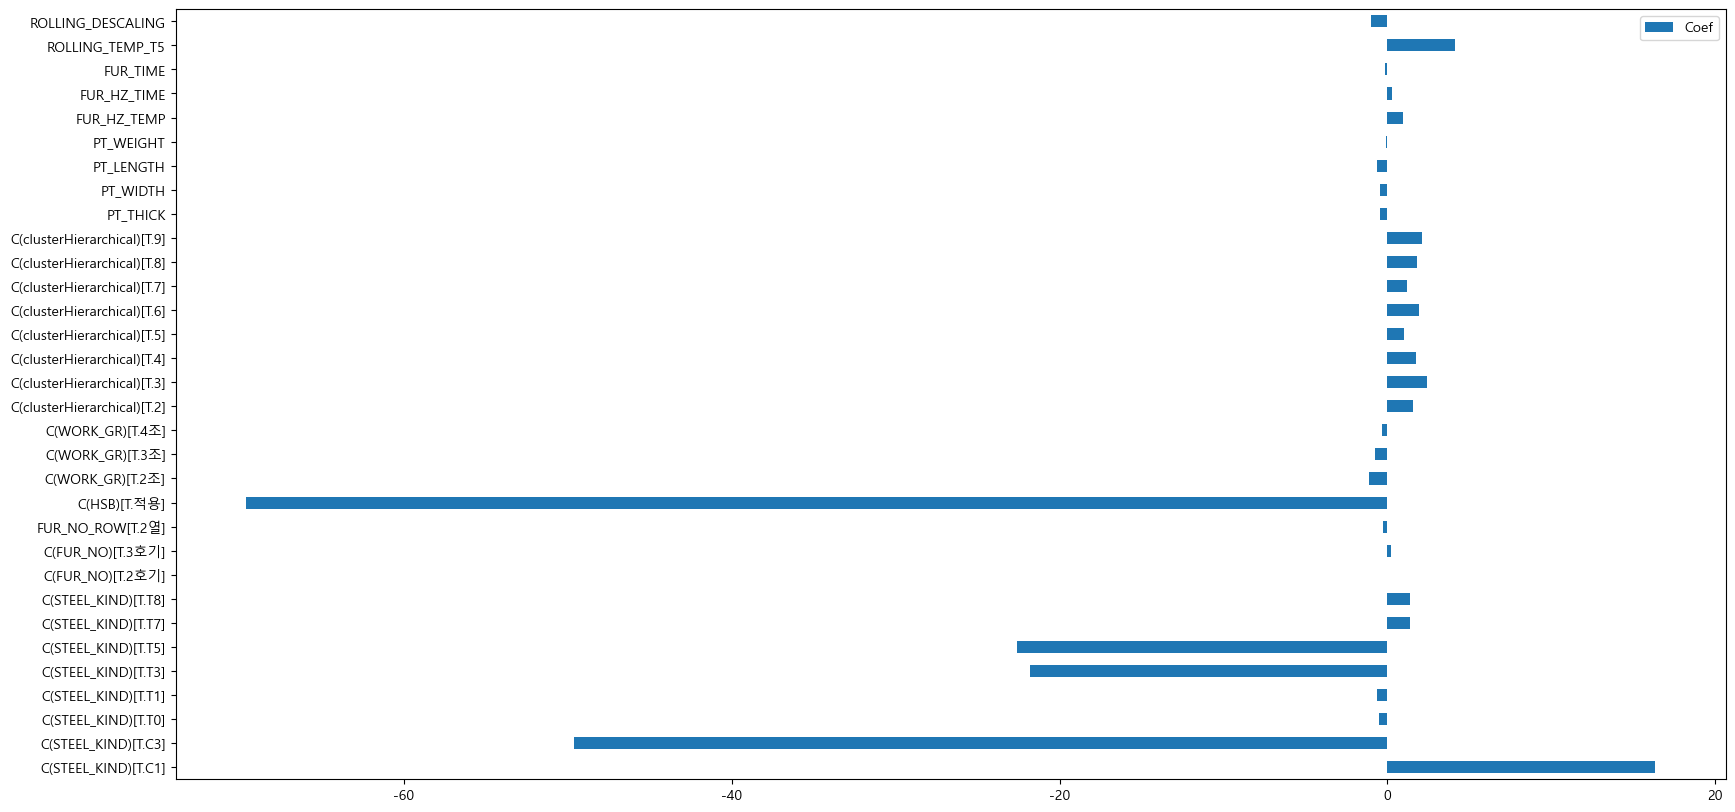

In [48]:
df_log_scaled_coef = pd.DataFrame({"Coef":log_result.params.values[1:]}, 
                        index = log_model.exog_names[1:])
df_log_scaled_coef.plot.barh(y = "Coef", figsize = (20, 10))

### 4-3. 의사결정 나무

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [50]:
df_x_dummy = pd.get_dummies(df_raw_x)

In [51]:
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: random seed)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_dummy, df_raw_y, 
                                                                test_size = 0.3, random_state = 1234)  

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (504, 121)
train data Y size : (504,)
test data X size : (216, 121)
test data Y size : (216,)


In [52]:
tree_uncustomized = DecisionTreeClassifier(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

# 훈련 데이터 설명력
print("Accucary on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))

# test 데이터 설명력
print("Accucary on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Accucary on training set: 1.000
Accucary on test set: 0.986


In [53]:
para_depth = [depth for depth in range(1, 15)] 
para_leaf = [n_leaf * 5 for n_leaf in range(1, 11)] 
para_split = [n_split * 2 for n_split in range(1, 11)] 

In [54]:
estimator = DecisionTreeClassifier(random_state = 1234)
param_grid = {"max_depth": para_depth,
              "min_samples_split": para_split,
              "min_samples_leaf": para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring = "accuracy", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, random_state=1234)

best parameter: 
{'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 2}

best score: 
0.964


In [55]:
tree_final = DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 5, min_samples_split = 2, random_state = 1234)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, random_state=1234)

In [56]:
# 평가
y_pred = tree_final.predict(df_test_x)
print("Accuracy: {0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy: 0.991

Confusion matrix: 
[[145   0]
 [  2  69]]


In [57]:
# 컬럼명
feature_names = df_train_x.columns

# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = feature_names
df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3).head(10)

,Feature,Importance
10,ROLLING_TEMP_T5,0.600
92,HSB_미적용,0.162
6,FUR_SZ_TEMP,0.127
0,PT_THICK,0.093
11,ROLLING_DESCALING,0.009
45,SPEC_KR-A,0.009
67,SPEC_NV-A32,0.000
79,STEEL_KIND_C1,0.000
90,FUR_NO_ROW_1열,0.000
89,FUR_NO_3호기,0.000


### 4-4. 랜덤포레스트

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rf_uncustomized = RandomForestClassifier(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)

print("Accucary on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))

print("Accucary on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Accucary on training set: 1.000
Accucary on test set: 0.958


In [60]:
para_n_tree = [n_tree * 10 for n_tree in range(1,11)]
para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]
para_split = [n_split * 1 for n_split in range(2,21)]
para_depth = [n_depth for n_depth in range(1,11)]

In [61]:
estimator = RandomForestClassifier(n_estimators = 100, random_state = 1234)
param_grid = {"min_samples_split": para_split,
              "min_samples_leaf": para_leaf,
              "max_depth" : para_depth,
              "n_estimators" : para_n_tree}

grid_rf = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs = -1)
grid_rf.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter: \n{}".format(grid_rf.best_params_))
print("\nbest score: \n{}".format(grid_rf.best_score_.round(3)))

best estimator model: 
RandomForestClassifier(max_depth=10, min_samples_split=4, random_state=1234)

best parameter: 
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}

best score: 
0.948


In [62]:
rf_final = RandomForestClassifier(random_state=1234, max_depth = 10, min_samples_leaf = 1, min_samples_split = 4, n_estimators = 100)
rf_final.fit(df_train_x, df_train_y)

y_pred = rf_final.predict(df_test_x)
print("Accuracy of training set: {0:.3f}\n".format(rf_final.score(df_train_x, df_train_y)))
print("Accuracy of test set: {0:.3f}\n".format(rf_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy of training set: 0.982

Accuracy of test set: 0.954

Confusion matrix: 
[[143   2]
 [  8  63]]


In [63]:
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3).head(10)

,Feature,Importance
10,ROLLING_TEMP_T5,0.214
0,PT_THICK,0.067
6,FUR_SZ_TEMP,0.064
9,FUR_EXTEMP,0.057
1,PT_WIDTH,0.054
11,ROLLING_DESCALING,0.052
92,HSB_미적용,0.052
2,PT_LENGTH,0.050
93,HSB_적용,0.045
4,FUR_HZ_TEMP,0.042


### 4-5. 그래디언트 부스팅

In [64]:
from sklearn.ensemble import GradientBoostingClassifier 

In [65]:
gb_uncustiomized = GradientBoostingClassifier(random_state=1234)
gb_uncustiomized.fit(df_train_x,df_train_y)

print('score on training set : {:.3f}'.format(gb_uncustiomized.score(df_train_x, df_train_y)))
print('score on test set : {:.3f}'.format(gb_uncustiomized.score(df_test_x, df_test_y)))

score on training set : 1.000
score on test set : 0.991


In [66]:
gb_uncustiomized

GradientBoostingClassifier(random_state=1234)

In [67]:
para_n_tree = [n_tree * 10 for n_tree in range(1,11)]
para_leaf = [n_leaf * 1 for n_leaf in range(1,40)]
para_split = [n_split * 2 for n_split in range(1,31)]
para_depth = [n_depth for n_depth in range(1,11)]
para_lr = [lr * 0.1 for lr in range(1,10)]

In [68]:
estimator = GradientBoostingClassifier(n_estimators = 100, random_state=1234)
param_grid = {"learning_rate": para_lr, "max_depth": para_depth, "min_samples_leaf": para_leaf}

grid_gb = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs = -1)
grid_gb.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_gb.best_estimator_))
print("\nbest parameter: \n{}".format(grid_gb.best_params_))
print("\nbest score: \n{}".format(grid_gb.best_score_.round(3)))

best estimator model: 
GradientBoostingClassifier(learning_rate=0.2, max_depth=9, min_samples_leaf=3,
                           random_state=1234)

best parameter: 
{'learning_rate': 0.2, 'max_depth': 9, 'min_samples_leaf': 3}

best score: 
0.994


In [69]:
gb_final = GradientBoostingClassifier(random_state = 1234, min_samples_leaf = 3, max_depth = 9, learning_rate = 0.2)
gb_final.fit(df_train_x, df_train_y)

y_pred = gb_final.predict(df_test_x)
print("Accuracy of training set: {0:.3f}\n".format(gb_final.score(df_train_x, df_train_y)))
print("Accuracy of test set: {0:.3f}\n".format(gb_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy of training set: 1.000

Accuracy of test set: 0.995

Confusion matrix: 
[[144   1]
 [  0  71]]


In [70]:
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["importance"] = gb_final.feature_importances_
df_importance.sort_values("importance", ascending=False, inplace=True)
df_importance.round(3).head(10)

,Feature,importance
10,ROLLING_TEMP_T5,0.557
92,HSB_미적용,0.144
11,ROLLING_DESCALING,0.133
6,FUR_SZ_TEMP,0.119
0,PT_THICK,0.011
8,FUR_TIME,0.011
93,HSB_적용,0.005
3,PT_WEIGHT,0.004
45,SPEC_KR-A,0.003
7,FUR_SZ_TIME,0.003


## 5. 결론

1. 로지스틱 회귀 결과 모델의 설명력 :  0.5900

2. 의사결정나무 모델 설명력 : 0.964  
변수 설명력: ROLLING_TEMP_T5 > HSB_미적용 > FUR_SZ_TEMP > PT_THICK > ROLLING_DESCALING

3. 랜덤포레스트 모델 설명력 : 0.954  
변수 설명력: ROLLING_TEMP_T5 > PT_THICK > FUR_SZ_TEMP > FUR_EXTEMP > PT_WIDTH

4. 그래디언트부스팅 모델 설명력 : 0.995    
변수 설명력: ROLLING_TEMP_T5 > HSB_미적용 > ROLLING_DESCALING >  FUR_SZ_TEMP >	PT_THICK

Scale 불량 발생을 줄이는 방법

1. ROLLING_TEMP_T5(압연온도)를 낮춥니다.
2. HSB(후판 공장에서 가열중 발생되는 1차 Scale 제거장치)를 적용합니다.
3. FUR_SZ_TEMP()를 낮춘다.
4. PT_THK(plate 두께)를 줄입니다.
5. ROLLING_DESCALING(압연 중 descaling 횟수)를 늘립니다.
6. FUR_EXTEMP(가열로 추출온도)를 낮춥니다.
7. PT_WIDTH(plate 후반 지시폭)을 줄입니다.